In [7]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report

#note: 
# scikit-learn for simpler projects, rapid prototyping, and small-to-medium-sized datasets.
# h2o when dealing with large-scale machine learning projects, distributed data, or when need powerful AutoML capabilities and scalability.

%matplotlib inline

# load data & valid check

In [19]:
data = pd.read_csv("C:/Users/chenl/Data Science prep/conversion_data.csv")
print(data.head())
data.info()
# country/ UK/ the user is based in the UK
# age/ 25/ the user is 25 yr old
# new_user/ 1/ she created her account during this session
# source/ Ads/ she came to the site by clicking on an ad
# total_pages_visited/ 1/ she visited just 1 page during that session
# converted/ 0/ this user did not buy during this session. this user did not buy during this session. These are the users whose behavior we want to change!

  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [18]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [21]:
for column in data.columns:
    uniques = sorted(data[column].unique())
    print(column, len(uniques), uniques[:5])

country 4 ['China', 'Germany', 'UK', 'US']
age 60 [17, 18, 19, 20, 21]
new_user 2 [0, 1]
source 3 ['Ads', 'Direct', 'Seo']
total_pages_visited 29 [1, 2, 3, 4, 5]
converted 2 [0, 1]


outliers

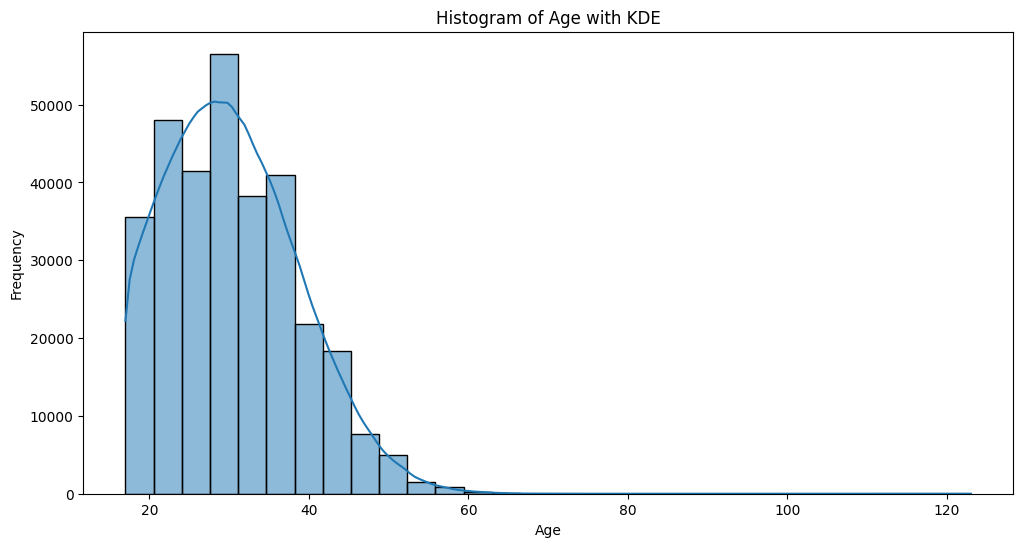

In [29]:
# box plot
# plt.figure(figsize=(10,5))
# sns.boxplot(y=data["age"])
# plt.title("age distribution")
# plt.show()

#histgarm
plt.figure(figsize=(12, 6))
sns.histplot(data['age'], kde=True, bins=30)
plt.title('Histogram of Age with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [28]:
data[data["age"]>=80]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


two outlier seems like invalid, delete them

In [30]:
data = data[data['age'] < 100]

# EDA

   country      mean   count
0    China  0.001332   76602
1  Germany  0.062428   13055
2       UK  0.052612   48449
3       US  0.037801  178092


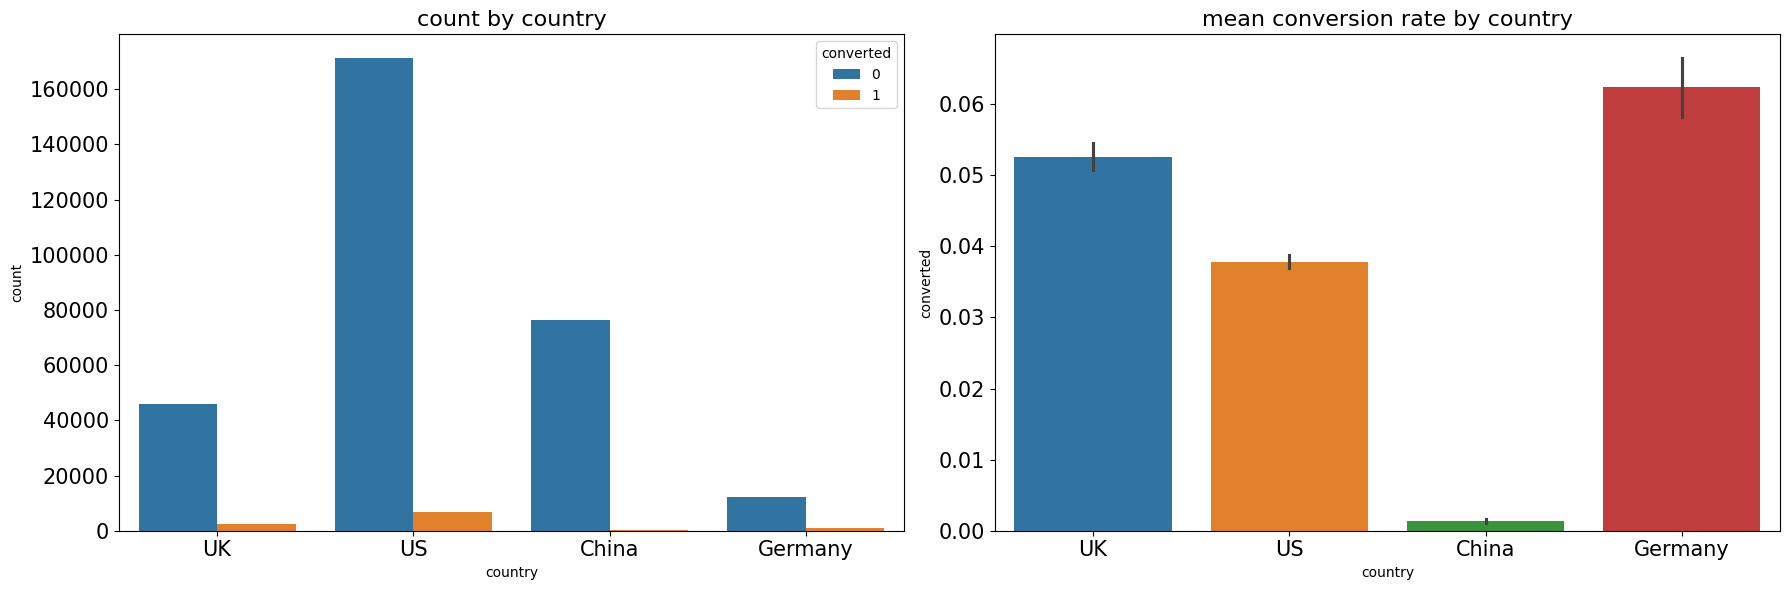

In [51]:
# by country distribution
country=data[['country', 'converted']].groupby("country").agg(
    mean=("converted","mean"),
    count=("converted","count")
).reset_index()
print(country)

#graph
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.countplot(x="country",hue="converted",data=data,ax=ax[0])
ax[0].set_title("count by country", fontsize=16)
# ax[0].set_xlabel("Source", fontsize=15)  
# ax[0].set_ylabel("Count", fontsize=15)   
# ax[0].tick_params(axis="x", labelsize=15)
# ax[0].tick_params(axis="y", labelsize=15)

sns.barplot(x="country",y="converted",hue="country",data=data,ax=ax[1])
ax[1].set_title("mean conversion rate by country", fontsize=16)
# ax[1].tick_params(axis="x", labelsize=15)
# ax[1].tick_params(axis="y", labelsize=15)

plt.tight_layout()
plt.show()

   country      mean   count
0    China  0.001332   76602
1  Germany  0.062428   13055
2       UK  0.052612   48449
3       US  0.037801  178092


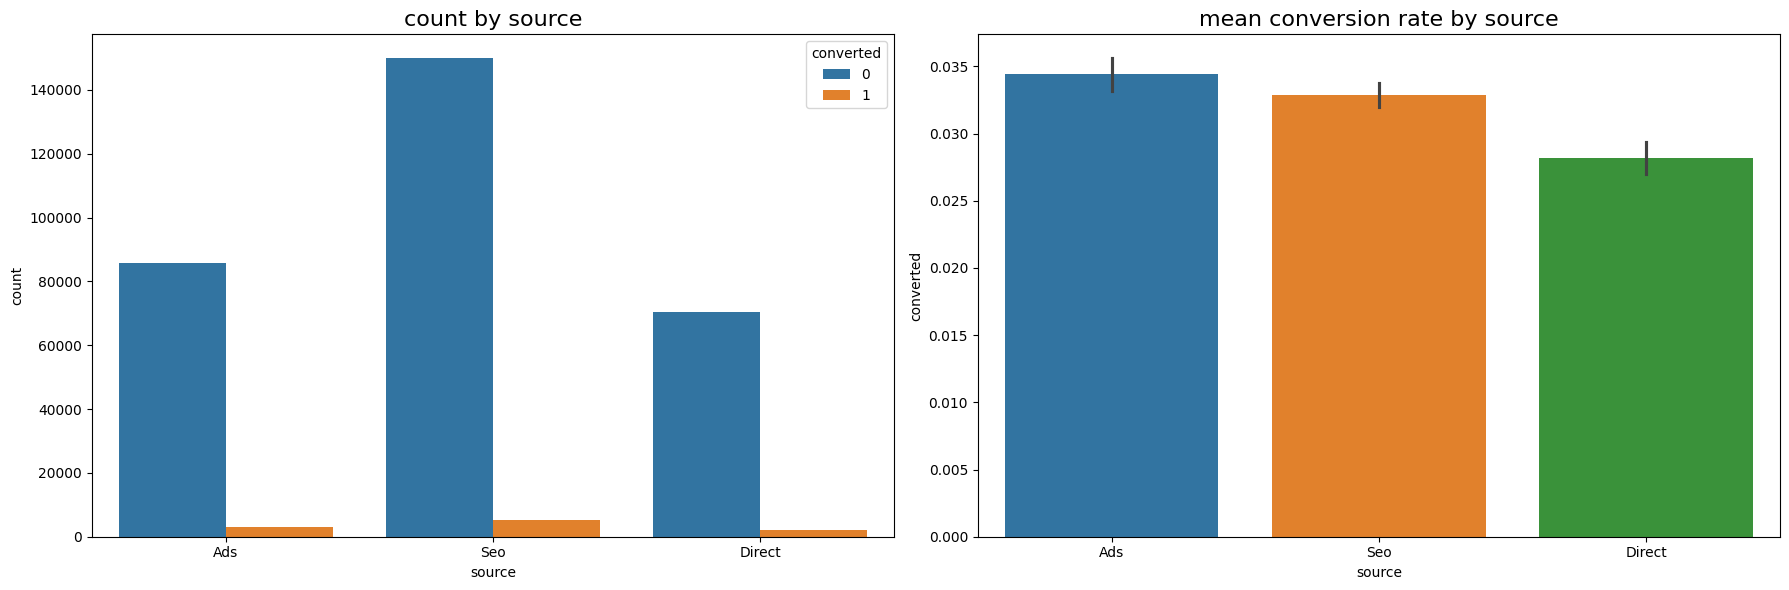

In [55]:
# by sources distribution
source=data[['source', 'converted']].groupby("source").agg(
    mean=("converted","mean"),
    count=("converted","count")
).reset_index()
print(country)

#graph
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.countplot(x="source",hue="converted",data=data,ax=ax[0])
ax[0].set_title("count by source", fontsize=16)


sns.barplot(x="source",y="converted",hue="source",data=data,ax=ax[1])
ax[1].set_title("mean conversion rate by source", fontsize=16)

plt.tight_layout()
plt.show()

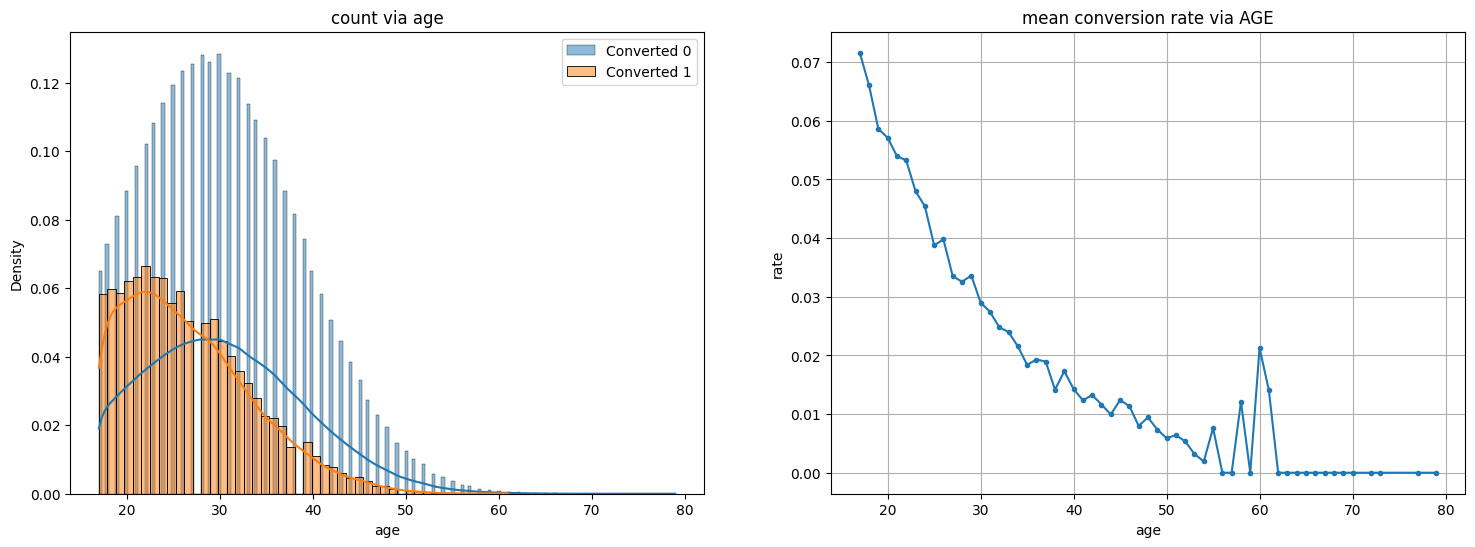

In [71]:
# by age distribution
age=data[['age', 'converted']].groupby("age").agg(
    mean=("converted","mean"),
    count=("converted","count")
).reset_index()

#note: distribution of both conversion and whole population sample 
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
# hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
# sns.distplot(data[data["converted"]==0]["age"],label="Converted 0",ax=ax[0],hist_kws=hist_kws)
# sns.distplot(data[data["converted"]==1]["age"],label="Converted 1",ax=ax[0],hist_kws=hist_kws)

# Plotting age distribution for 'Converted 0'
sns.histplot(data[data["converted"] == 0]["age"], label="Converted 0", ax=ax[0], kde=True, edgecolor='black', alpha=0.5, stat='density')
# Plotting age distribution for 'Converted 1'
sns.histplot(data[data["converted"] == 1]["age"], label="Converted 1", ax=ax[0], kde=True, edgecolor='black', alpha=0.5, stat='density')

ax[0].set_title("count via age")
ax[0].legend()

ax[1].plot(age["age"],age["mean"], '.-')
ax[1].set_title("mean conversion rate via AGE")
ax[1].set_xlabel("age")
ax[1].set_ylabel("rate")
ax[1].grid(True)

plt.show()

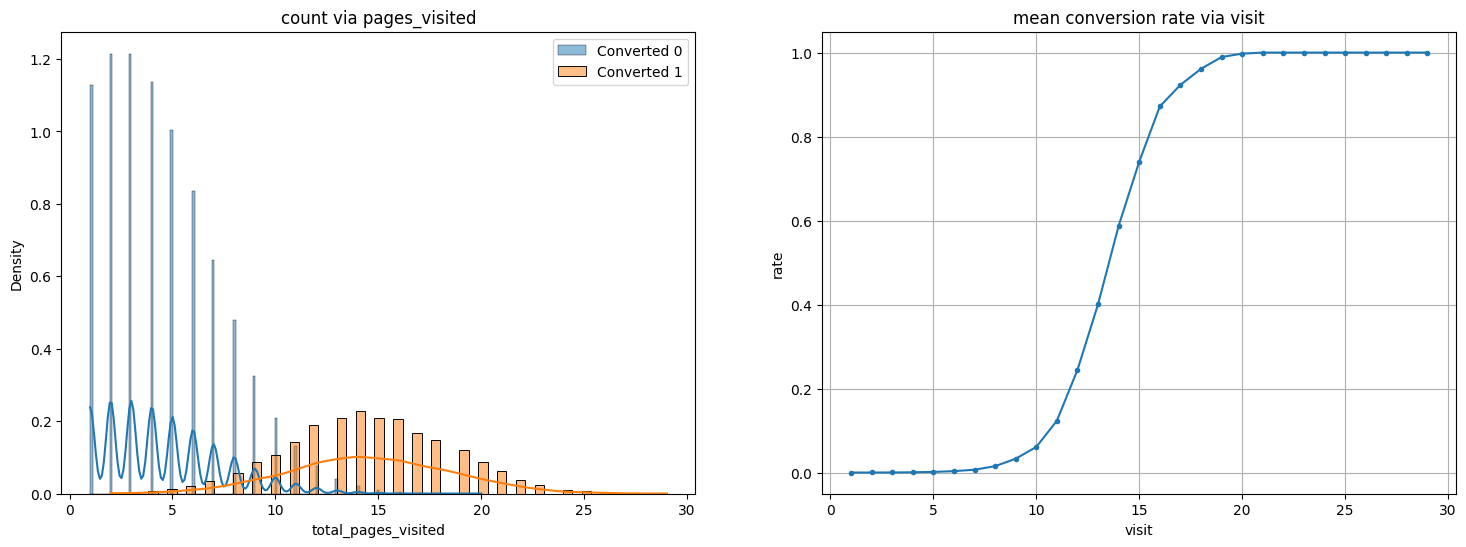

In [73]:
# page visit 
visit=data[['total_pages_visited', 'converted']].groupby("total_pages_visited").agg(
    mean=("converted","mean"),
    count=("converted","count")
).reset_index()

#note: distribution of both conversion and whole population sample 
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
# hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
# sns.distplot(data[data["converted"]==0]["age"],label="Converted 0",ax=ax[0],hist_kws=hist_kws)
# sns.distplot(data[data["converted"]==1]["age"],label="Converted 1",ax=ax[0],hist_kws=hist_kws)

# Plotting age distribution for 'Converted 0'
sns.histplot(data[data["converted"] == 0]["total_pages_visited"], label="Converted 0", ax=ax[0], kde=True, edgecolor='black', alpha=0.5, stat='density')
# Plotting age distribution for 'Converted 1'
sns.histplot(data[data["converted"] == 1]["total_pages_visited"], label="Converted 1", ax=ax[0], kde=True, edgecolor='black', alpha=0.5, stat='density')

ax[0].set_title("count via pages_visited")
ax[0].legend()

ax[1].plot(visit["total_pages_visited"],visit["mean"], '.-')
ax[1].set_title("mean conversion rate via visit")
ax[1].set_xlabel("visit")
ax[1].set_ylabel("rate")
ax[1].grid(True)

plt.show()


# modeling

In [75]:
# data processing
# no null value, but category features needed encoding, 
from sklearn.preprocessing import OneHotEncoder
data=pd.get_dummies(data,columns=['country',"source"],drop_first=True)
# China and Ads were dropped

# no scaling needed for now
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# data[['age', 'total_pages_visited']]=scaler.fit_transform(data[['age', 'total_pages_visited']])

# new_user is a binary feature as well

In [77]:
from sklearn.model_selection import train_test_split
x=data.drop("converted",axis=1)
y=data["converted"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

Logistic Regression: Simple, interpretable baseline model.

Decision Trees: Understandable and captures non-linear relationships. (chosen for interpretability)

Random Forests and Gradient Boosting (e.g., XGBoost): Strong ensemble models for robust performance. (ensemnle for better performance)

Support Vector Machines (SVM): Effective for high-dimensional spaces. 

k-Nearest Neighbors (k-NN): Useful for simpler problems with clear class boundaries. (likely not clear boumndaries)

# decision tree - baseline

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
y_pred=tree_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# Precision: 0.99, indicating that when the model predicts 0, it is correct 99% of the time.
# Precision: 0.82, meaning 82% of predicted 1s are correct.
# Recall: 0.64, showing that the model correctly identifies 64% of true 1s

[[91315   431]
 [ 1132  1982]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91746
           1       0.82      0.64      0.72      3114

    accuracy                           0.98     94860
   macro avg       0.90      0.82      0.85     94860
weighted avg       0.98      0.98      0.98     94860



In [97]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_model,x,y,cv=5,scoring="recall")
print(scores)
#pretty consistent score, ensure model performance on unseen data
# depend on scenoria or problem, adjust scoring target as needed

[0.6495098  0.63529412 0.63529412 0.66356057 0.6586562 ]


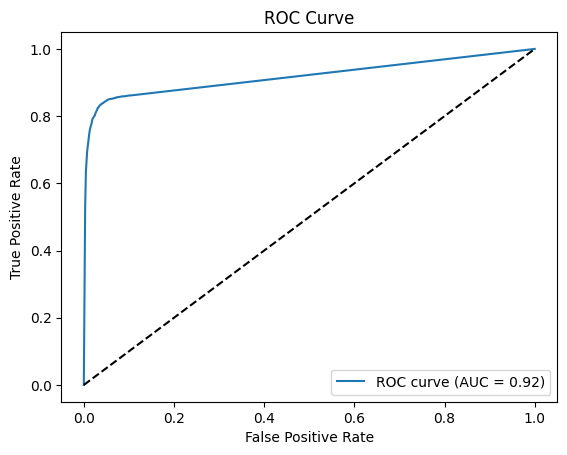

In [105]:
# ROC Curve: Plots the true positive rate (recall) against the false positive rate at various threshold settings. The closer the curve follows the top-left corner, the better the model.
# AUC (Area Under Curve): Measures the overall performance of the classifier. A score of 1 indicates a perfect model, and 0.5 suggests no better than random guessing.
y_prob = tree_model.predict_proba(x_test)[:, 1] # used for probability scores for each class to evaluate the model performance, plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [85]:
# feature importance
importances=tree_model.feature_importances_
feature_names=x_train.columns
feature_importance=pd.Series(importances,index=feature_names).sort_values(ascending=False)
print(feature_importance)

total_pages_visited    0.795257
age                    0.083349
new_user               0.050127
source_Seo             0.015920
country_UK             0.014863
country_US             0.014779
country_Germany        0.013856
source_Direct          0.011847
dtype: float64


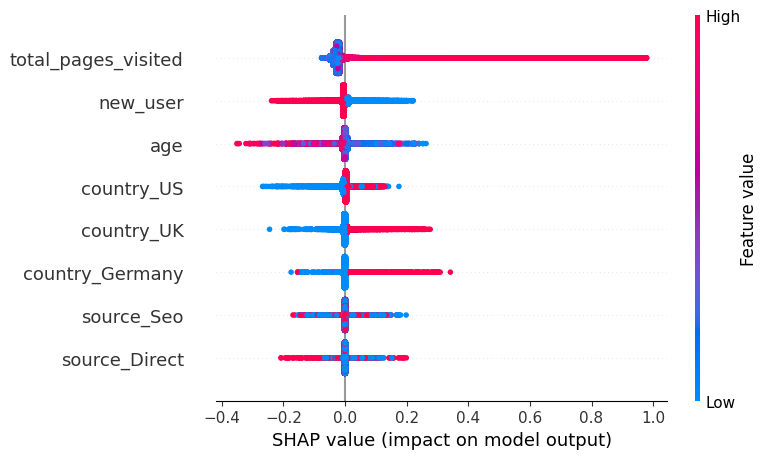

In [87]:
import shap
explainer=shap.TreeExplainer(tree_model)
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test)

# Total Pages Visited has the most significant impact on the model, with higher values (red) increasing the likelihood of conversion.
# New User and Age also show influence, with different ranges impacting the outcome.
# Country and Source features contribute as well but to a lesser extent.

# Hyperparameter Tuning
GridSearchCV for exhaustive search.

RandomizedSearchCV for a faster, randomized search.

In [90]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "max_depth":[None,10,20],
    'min_samples_split': [5, 15, 10]
}
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'max_depth': 10, 'min_samples_split': 15}


In [106]:
best_params=grid.best_params_
best_model=DecisionTreeClassifier(**best_params)
best_model.fit(x_train,y_train)
y_pred=best_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[91345   401]
 [ 1040  2074]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91746
           1       0.84      0.67      0.74      3114

    accuracy                           0.98     94860
   macro avg       0.91      0.83      0.87     94860
weighted avg       0.98      0.98      0.98     94860

